<a href="https://colab.research.google.com/github/desireesosa/EDPII/blob/main/MetodoRichardson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ecuacion de Calor \
Metodo de Richardson**

*El siguiente programa se extrae de un Notebook, solo se resuelven los problemas solicitados.*

In [2]:
#librerias
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D
from matplotlib import cm  # colormap

In [3]:
#definimos
def f(x):
    return np.sin(np.pi*x)

A = sp.Matrix([[3,-1, 0, 0, 0, 0, 0, 0, 0],
              [-1, 3,-1, 0, 0, 0, 0, 0, 0],
              [0, -1, 3,-1, 0, 0, 0, 0, 0],
              [0, 0, -1, 3,-1, 0, 0, 0, 0],
              [0, 0, 0, -1, 3,-1, 0, 0, 0],
              [0, 0, 0, 0, -1, 3,-1, 0, 0],
              [0, 0, 0, 0, 0, -1, 3,-1, 0],
              [0, 0, 0, 0, 0, 0, -1, 3,-1],
              [0, 0, 0, 0, 0, 0, 0, -1, 3,]])

***Ejercicio 1***

*Codificar la Matriz A de manera simple.*

In [4]:
#ejercicio 1
n = 9
A_np = np.diag([3]*n) + np.diag([-1]*(n-1), k=1) + np.diag([-1]*(n-1), k=-1)
A = sp.Matrix(A_np)
print("Matriz A:")
print(A)

Matriz A:
Matrix([[3, -1, 0, 0, 0, 0, 0, 0, 0], [-1, 3, -1, 0, 0, 0, 0, 0, 0], [0, -1, 3, -1, 0, 0, 0, 0, 0], [0, 0, -1, 3, -1, 0, 0, 0, 0], [0, 0, 0, -1, 3, -1, 0, 0, 0], [0, 0, 0, 0, -1, 3, -1, 0, 0], [0, 0, 0, 0, 0, -1, 3, -1, 0], [0, 0, 0, 0, 0, 0, -1, 3, -1], [0, 0, 0, 0, 0, 0, 0, -1, 3]])


In [5]:
b = sp.Matrix([f(0.1), f(0.2), f(0.3), f(0.4), f(0.5), f(0.6), f(0.7), f(0.8), f(0.9)])

***Ejercicio 2***¨

*Definir las entradas de b de manera más simple (quizás con un bucle).*

In [6]:
#ejercicio 2
b_list = []
for k in range(1,10):
  b_list.append(f(0.1*k))

b = sp.Matrix(b_list) # Assign the SymPy Matrix back to b
print("Vector b:")
print(b)

Vector b:
Matrix([[0.309016994374947], [0.587785252292473], [0.809016994374947], [0.951056516295154], [1.00000000000000], [0.951056516295154], [0.809016994374947], [0.587785252292473], [0.309016994374948]])


*Ahora, tenemos que:*

In [7]:
A

Matrix([
[ 3, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  3, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  3, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  3, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  3, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  3, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  3, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  3, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  3]])

In [8]:
b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

In [9]:
def richardson_1(A, b, j):
    b_1 = b
    for i in range(j+1):
        sol = A.LUsolve(b_1)
        b_1 = sol
        _ = None #Para que no imprima resultados parciales
    return b_1

In [10]:
richardson_1(A, b, 3)

Matrix([
[0.212692337894623],
[0.404564867841463],
[  0.5568357697548],
[0.654599706821597],
[0.688286863720354],
[0.654599706821597],
[  0.5568357697548],
[0.404564867841463],
[0.212692337894623]])

In [11]:
def richardson(A, b, j):
    S = []
    b_1 = b.copy()

    for i in range(j+1):
        S.append(np.array(b_1, dtype=float).reshape(-1))  # vector fila
        sol = A.LUsolve(b_1)
        b_1 = sol

    return np.array(S)   # matriz resultado

***Ejercicio 4***

*Graficar para un valor particular de t > 0 y comparar contra la gráfica de la solución exacta (quizás necesite calcularla).*

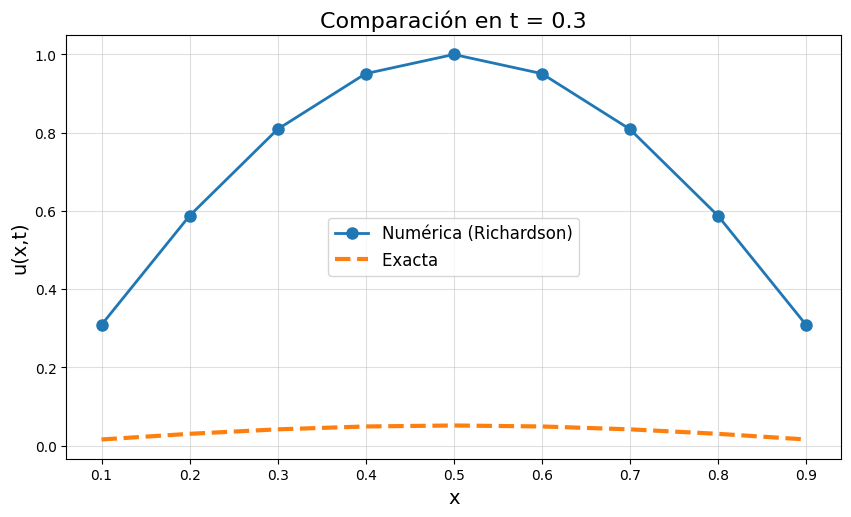

In [16]:
from scipy.linalg import lu_factor, lu_solve
r=0.4
h=1.0/(n+1)
x_internal= np.linspace(1/(n+1), n/(n+1), n)

def richardson_implicito(M, u0, steps):
    lu, piv = lu_factor(M)
    u = u0.copy().reshape(-1)
    U = np.zeros((steps+1, len(u)))
    U[0] = u
    for n in range(1, steps+1):
        u = lu_solve((lu,piv), u)
        U[n] = u
    return U

L = np.diag([2]*n) + np.diag([-1]*(n-1), -1) + np.diag([-1]*(n-1), 1)
M = np.eye(n) + r * L
t_objetivo_plot = 0.3

j = int(t_objetivo_plot / k)
if j < 1:
    j = 1

b_np = np.array(b).astype(float)
U = richardson_implicito(M, b_np, j)
t_objetivo = t_objetivo_plot

t_objetivo = 0.3
n_obj = int(t_objetivo/k)

u_exacta = np.exp(-np.pi**2 * t_objetivo) * np.sin(np.pi * x_internal)

plt.figure(figsize=(10,5.5))
plt.plot(x_internal, U[n_obj], 'o-', label='Numérica (Richardson)', markersize=8, lw=2)
plt.plot(x_internal, u_exacta, '--', label=r'Exacta ', lw=3)
plt.title(f'Comparación en t = {t_objetivo}', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('u(x,t)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)
plt.show()

***Ejercicio 5***

*¿Es necesario resolver el sistema de 9 x 9 o podemos hacer una simplificación?*

Si, ya que el esquema implicito acopla todos los nodos y con el metodo Richardson no factorizamos ni invertimos a la matriz.

*Ahora:*

In [ ]:
j = 20 # Número de pasos en el tiempo

In [ ]:
U=richardson(A, b, j)

In [ ]:
x = np.linspace(0, 1, 9) #Número de nodos internos en X
y = np.linspace(0, 0.6, j+1) #Debe coincidir con el tamaño de j por k (tiempo)
X, Y = np.meshgrid(x, y)

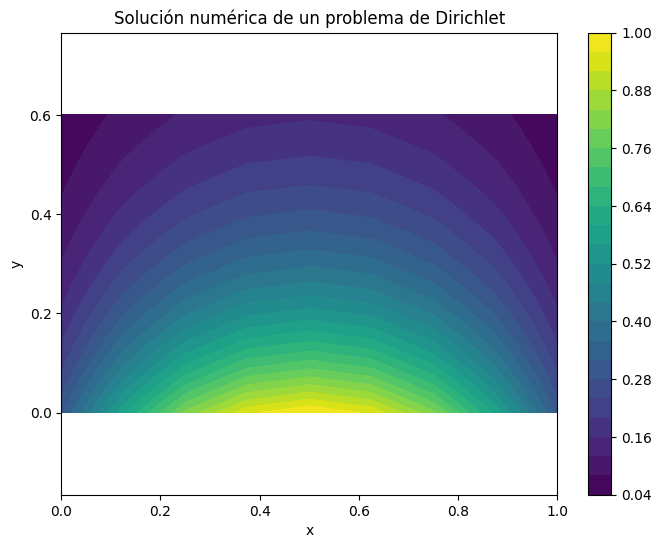

In [ ]:
# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de un problema de Dirichlet')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

***Explicacion de la grafica***

*La grafica representa un mapa de colores en dos dimensiones, los colores representan el valor de la solución numerica en cada punto del dominio.*

*Se puede interpretar de manera fisica, pensando en un problema clasico de transferencia de calor; el borde inferior esta a temperatura alta y el borde superior estan a temperatura baja*

In [ ]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuación del calor con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

<IPython.core.display.Javascript object>

***Explicar grafica***


***Ejercicio 6***

*Hay un ligero detalle con la precisión de estas gráficas, ¿cuál?*